In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize


In [4]:
# Building functions
# Fetch historical data
def fetch_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Calculate expected returns and covariance matrix
def calculate_returns_covariance(data):
    returns = data.pct_change().mean() * 252
    covariance = data.pct_change().cov() * 252
    return returns, covariance

# Calculate portfolio performance
def portfolio_performance(weights, returns, covariance):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))
    return portfolio_return, portfolio_volatility

# Generate random portfolios
def generate_random_portfolios(num_portfolios, returns, covariance):
    results = np.zeros((3, num_portfolios))
    weights_record = []
    for _ in range(num_portfolios):
        weights = np.random.random(len(returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_volatility = portfolio_performance(weights, returns, covariance)
        results[0, _] = portfolio_return
        results[1, _] = portfolio_volatility
        results[2, _] = results[0, _] / results[1, _]
        weights_record.append(weights)
    return results, weights_record

# Optimize portfolio
def optimize_portfolio(returns, covariance):
    num_assets = len(returns)
    args = (returns, covariance)

    def min_volatility(weights, returns, covariance):
        return portfolio_performance(weights, returns, covariance)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(min_volatility, num_assets * [1. / num_assets,], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)

    return result

[*********************100%%**********************]  186 of 186 completed


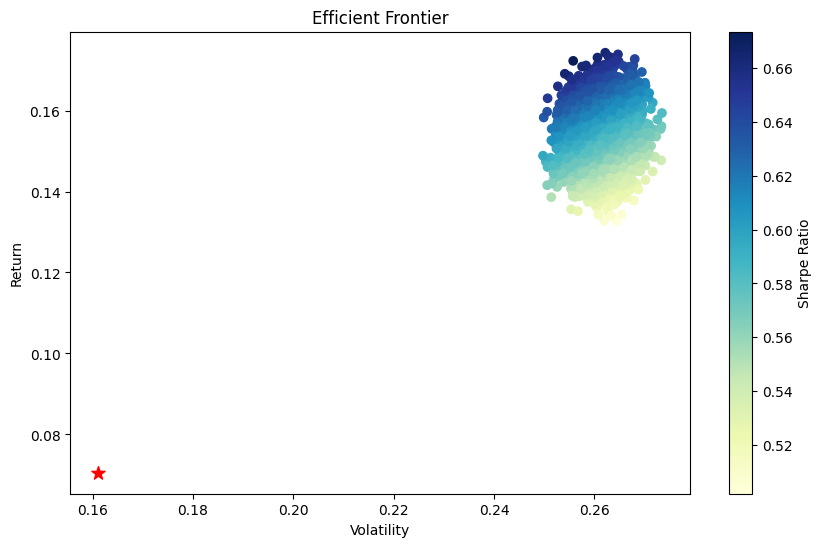

Optimal Portfolio Weights: [1.34408495e-16 2.15811773e-02 5.95958025e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.51618183e-17
 0.00000000e+00 0.00000000e+00 1.09725142e-16 6.60877902e-17
 1.61093682e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.13587889e-17 4.26887370e-16 2.07612650e-17
 7.50276201e-17 1.49263563e-16 1.56607925e-01 0.00000000e+00
 2.60345071e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.66746607e-18 0.00000000e+00 1.70451147e-16 8.84940335e-17
 1.01842266e-17 1.66647572e-16 4.61225101e-17 6.54507840e-17
 4.71528265e-17 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.64884135e-17 7.66965685e-17 0.00000000e+00 0.00000000e+00
 1.21473804e-16 5.59439246e-17 6.42839992e-17 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.23140418e-17 0.00000000e+00
 7.94607139e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.30529875e-16
 1.26497217e-17 0.00000000e+00 6.12024409e-17 4.39317378e-

In [14]:
# Main function
def main():
    # parameters
    tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'JNJ', 'UNH', 'V', 'PG', 'XOM', 'JPM', 'MA',
    'HD', 'CVX', 'ABBV', 'PEP', 'KO', 'MRK', 'NFLX', 'TSM', 'NKE', 'PFE', 'AVGO', 'LLY', 'COST', 'WMT', 'DIS',
    'ORCL', 'CSCO', 'VZ', 'CMCSA', 'INTC', 'ABT', 'MDT', 'ADBE', 'CRM', 'PYPL', 'TMO', 'UPS', 'WFC', 'DHR', 'IBM',
    'TXN', 'PM', 'ISRG', 'GS', 'NOW', 'MU', 'BX', 'NEE', 'LRCX', 'SPGI', 'UBER', 'HON', 'UNP', 'BKNG', 'T', 'RTX',
    'SCHW', 'COP', 'ETN', 'SYK', 'C', 'TJX', 'VRTX', 'LOW', 'ELV', 'PGR', 'BLK', 'KLAC', 'ADI', 'REGN', 'ANET',
    'BSX', 'BA', 'LMT', 'PANW', 'PLD', 'MMC', 'CB', 'MDT', 'ABNB', 'KKR', 'DE', 'ADP', 'SNPS', 'CI', 'AMT', 'CRWD',
    'MDLZ', 'CDNS', 'FI', 'SO', 'GILD', 'WM', 'APH', 'BMY', 'ICE', 'HCA', 'SBUX', 'MO', 'CMG', 'CL', 'MCO', 'DUK',
    'ZTS', 'SHW', 'AMGN', 'COF', 'EA', 'SYY', 'GPN', 'TGT', 'USB', 'WBA', 'GIS', 'TRV', 'MSCI', 'NSC',
    'VRSK', 'PPL', 'PEG', 'EXC', 'FIS', 'F', 'AEP', 'DD', 'DXC', 'PCAR', 'BKR', 'KMI', 'OKE', 'AON', 'STZ', 'KHC',
    'NOC', 'EQIX', 'ED', 'CNC', 'CEG', 'HLT', 'MTD', 'CTSH', 'HPQ', 'EBAY', 'VFC', 'VLO', 'PSX',
    'GM', 'HPE', 'WDC', 'DAL', 'ROK', 'ADNT', 'HWM', 'AKAM', 'RSG', 'WMB', 'MCHP', 'GWW', 'LYB', 'ITW',
    'CMCSA', 'PSX', 'NEM', 'MMC', 'MAA', 'CTLT', 'JNPR', 'GPC', 'CMA', 'RF', 'HBAN', 'NDAQ', 'RCL',
    'TROW', 'MTB', 'WAB', 'CNC', 'IR', 'OMC', 'XYL', 'PHM', 'PNW', 'CMI', 'ESS', 'ARE', 'WAT', 'NTRS'
]
    start_date = '2020-01-01'
    end_date = '2023-01-01'
    num_portfolios = 10000

    data = fetch_data(tickers, start_date, end_date)

    returns, covariance = calculate_returns_covariance(data)

    results, weights_record = generate_random_portfolios(num_portfolios, returns, covariance)

    # Finding optimal portfolio
    optimal_portfolio = optimize_portfolio(returns, covariance)

    # Plotting efficient frontier
    plt.figure(figsize=(10, 6))
    plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu', marker='o')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.scatter(optimal_portfolio.fun, portfolio_performance(optimal_portfolio.x, returns, covariance)[0],
                color='r', marker='*', s=100)
    plt.title('Efficient Frontier')
    plt.show()

    # Printing results
    print('Optimal Portfolio Weights:', optimal_portfolio.x)
    print('Expected Portfolio Return:', portfolio_performance(optimal_portfolio.x, returns, covariance)[0])
    print('Expected Portfolio Volatility:', optimal_portfolio.fun)

if __name__ == "__main__":
    main()